In [28]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pickle
import yaml

# Import local packages
from examples.norm_norm_diffuse_1d import (
    prior_pdf,
    likelihood_pdf,
    posterior_pdf,
    plot_approximate_posterior,
    approximate_posterior_quantiles_against_x,
    plot_approximate_posterior_quantiles_against_x,
    plot_approximate_posterior_quantiles_diff_against_x,
    plot_approximate_posterior_hist,
    true_posterior,
    simulator
)
from sbc.sbc_tools import plot_sbc_all
results_path = "/Users/Lieve/Documents/Masters Project/SBC-SBI/results/toy_examples/norm_norm_diffuse_1d/npe_a/"

In [2]:
# Define prior standard deviation
sigma = 150.

# Amortized NPE-A

In [3]:
amortized_posterior_ID = 0

# Load pre-trained amortized posterior
amortized_posterior_name = f"amortized_posterior{amortized_posterior_ID}"
path_to_amortized_posterior = results_path + amortized_posterior_name + ".pkl"
path_to_amortized_posterior_config = results_path + amortized_posterior_name + ".yaml"
path_to_amortized_posterior_simulations = results_path + amortized_posterior_name + "_simulations" + ".npz"

# Load posterior
with open(path_to_amortized_posterior, "rb") as f:
    amortized_posterior = pickle.load(f)

# Load config
with open(path_to_amortized_posterior_config, "r") as f:
    amortized_posterior_config = yaml.safe_load(f)

# Load samples
amortized_posterior_simulations = np.load(path_to_amortized_posterior_simulations)

print(f"Amortized posterior config:")
amortized_posterior_config

Amortized posterior config:


{'num_components': 1,
 'num_simulations': 20000,
 'sigma': 150.0,
 'simulation_time': 0.0014267080000003318,
 'total_time': 27.053687416,
 'training_time': 27.052260708}

In [4]:
# Turn DirectPosterior object into callable function
def approximate_posterior_amortized(theta, x):
    """
    Output SNPE-A analytical posterior approximation \hat{p}(theta | x)

    theta and x must be 1D torch tensors
    """
    return torch.exp(amortized_posterior.potential(theta, x))

Plot amortized posterior approximation for different $x_\text{observed}$.

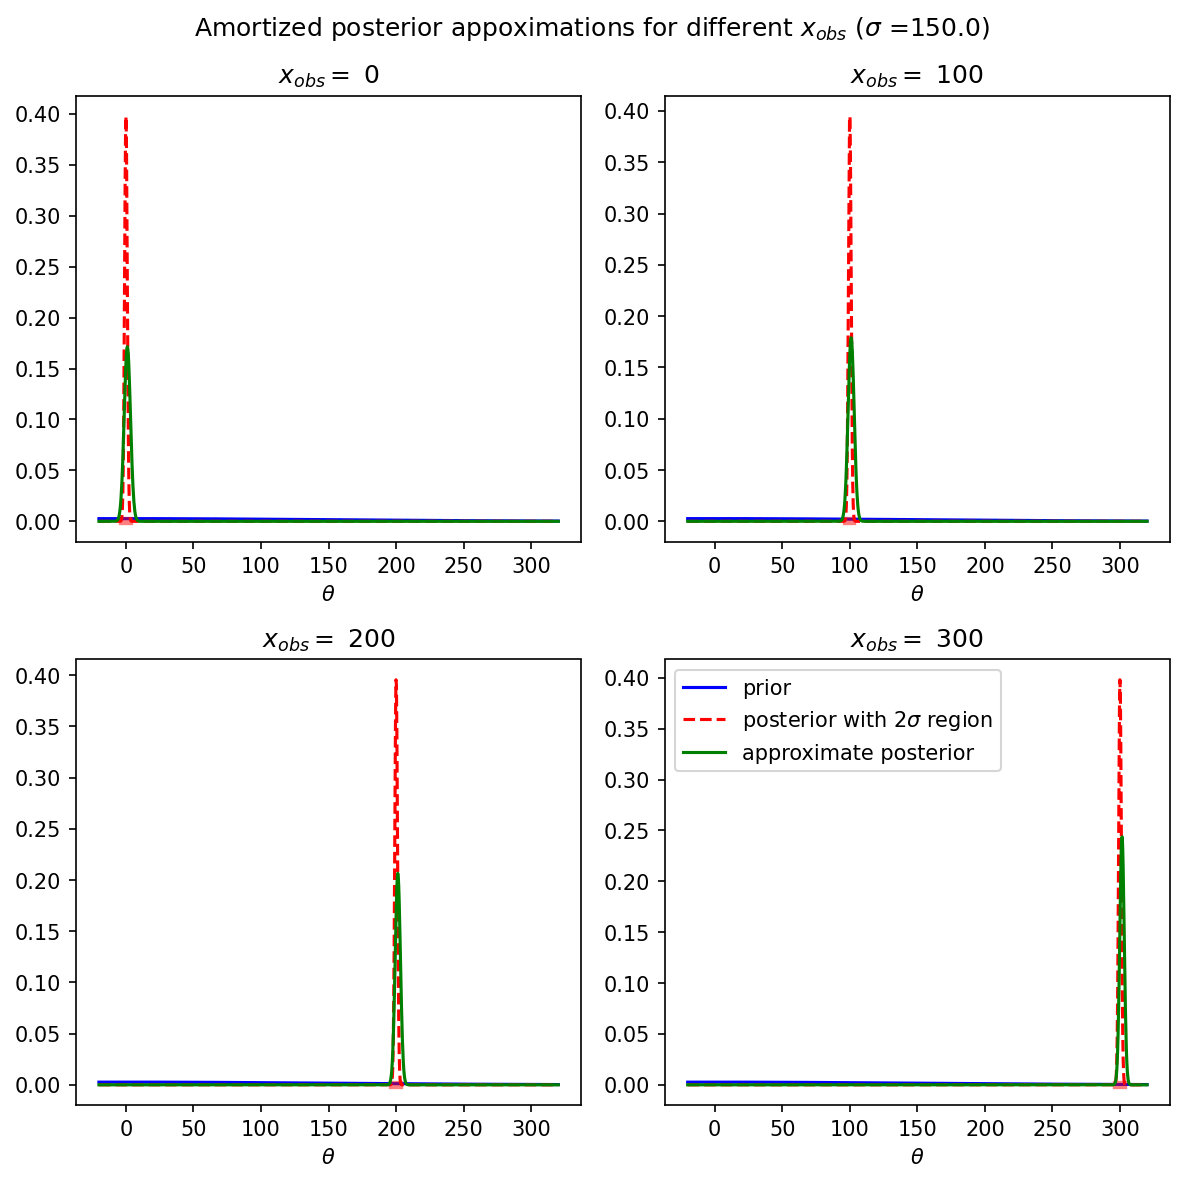

In [5]:
x_observed_values = [0, 100, 200, 300] # Range of observed data
theta_range = torch.linspace(-20,320, 1000).view(-1,1)
title = r"Amortized posterior appoximations for different $x_{obs}$ ($\sigma$ =" + f"{sigma})"
plot_approximate_posterior(approximate_posterior_amortized, prior_pdf, posterior_pdf, theta_range, x_observed_values, sigma, title=title)

Plot amortized posterior approximation for fixed $x_\text{observed}$.

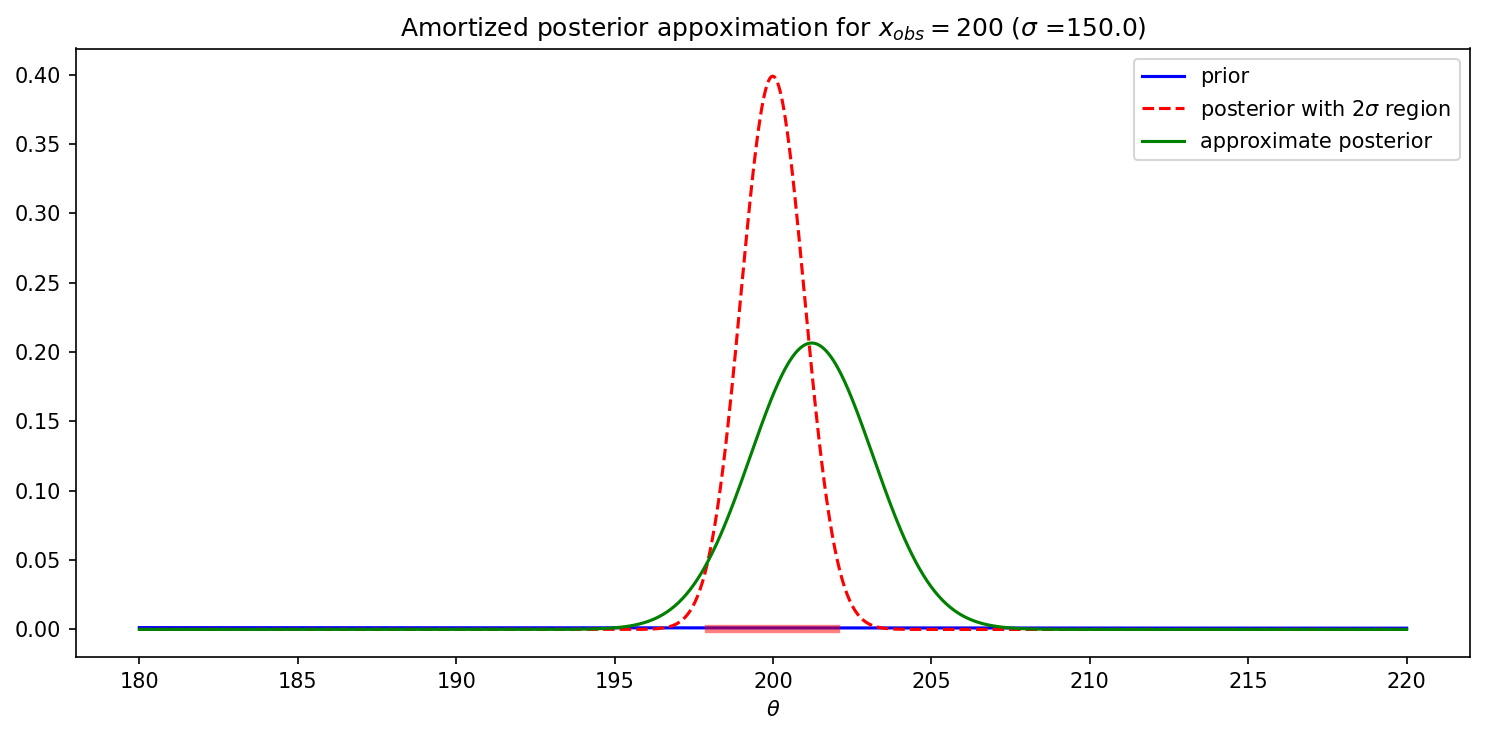

In [6]:
x_observed = 200 # Observed data
theta_range = torch.linspace(180,220,1000).view(-1,1)
title = r"Amortized posterior appoximation for $x_{obs} = $" +f"{x_observed} " + r"($\sigma$ =" + f"{sigma})"
plot_approximate_posterior(approximate_posterior_amortized, prior_pdf, posterior_pdf, theta_range, x_observed, sigma, title=title)

Plot quantiles of amortized posterior for various values of $x_\text{observed}$.

- Without the training samples

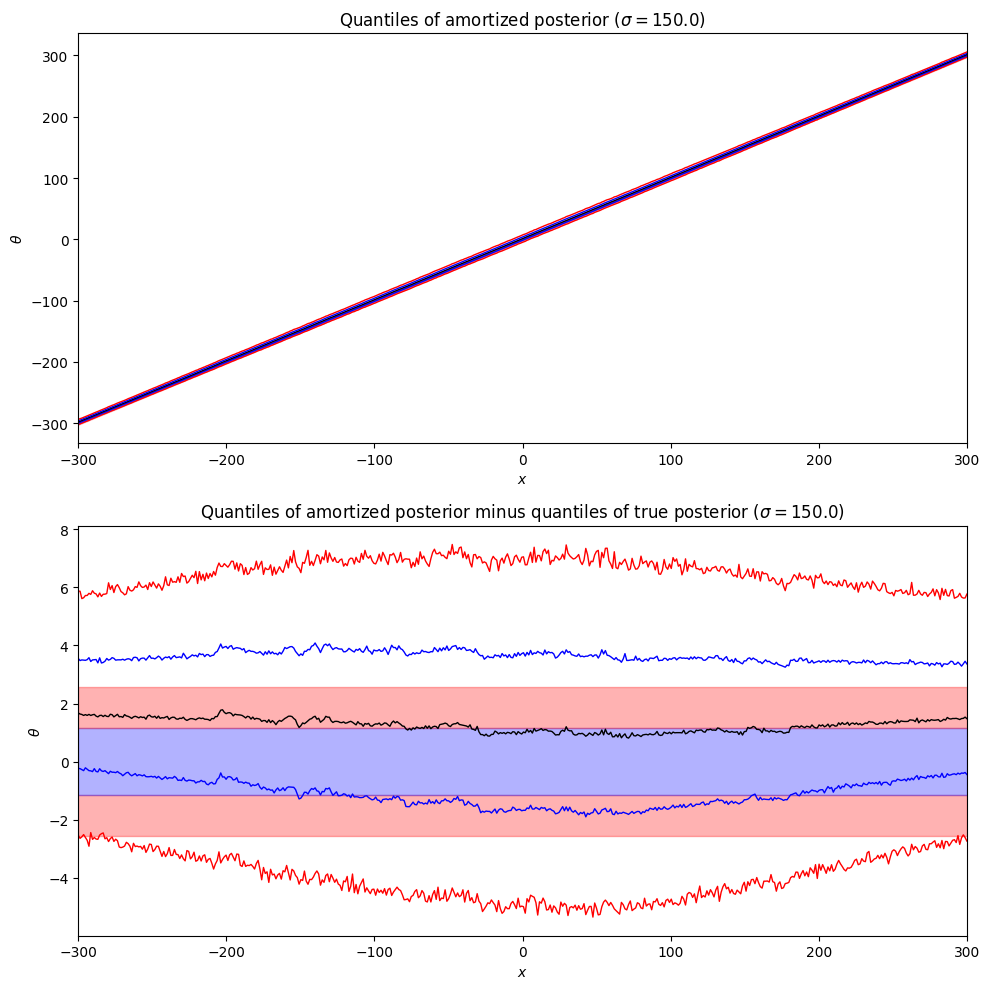

In [7]:
fig, ax = plt.subplots(figsize=(10,10), nrows=2)

x_range = np.linspace(-300,300,500)
quantiles = approximate_posterior_quantiles_against_x(amortized_posterior, x_range)

title = "Quantiles of amortized posterior" + r" ($\sigma = $" + f"{sigma})"
plot_approximate_posterior_quantiles_against_x(x_range, quantiles, sigma, title=title, ax=ax[0])

title = "Quantiles of amortized posterior minus quantiles of true posterior" + r" ($\sigma = $" + f"{sigma})"
plot_approximate_posterior_quantiles_diff_against_x(x_range, quantiles, sigma, title=title, ax=ax[1])

plt.tight_layout()
plt.show()

- With the training samples

In [8]:
# Retrieve samples
amortized_posterior_parameter_samples = amortized_posterior_simulations["parameter_samples"].reshape(-1)
amortized_posterior_data_samples = amortized_posterior_simulations["data_samples"].reshape(-1)
amortized_posterior_samples = {"parameter_samples": amortized_posterior_parameter_samples,
                                "data_samples": amortized_posterior_data_samples}

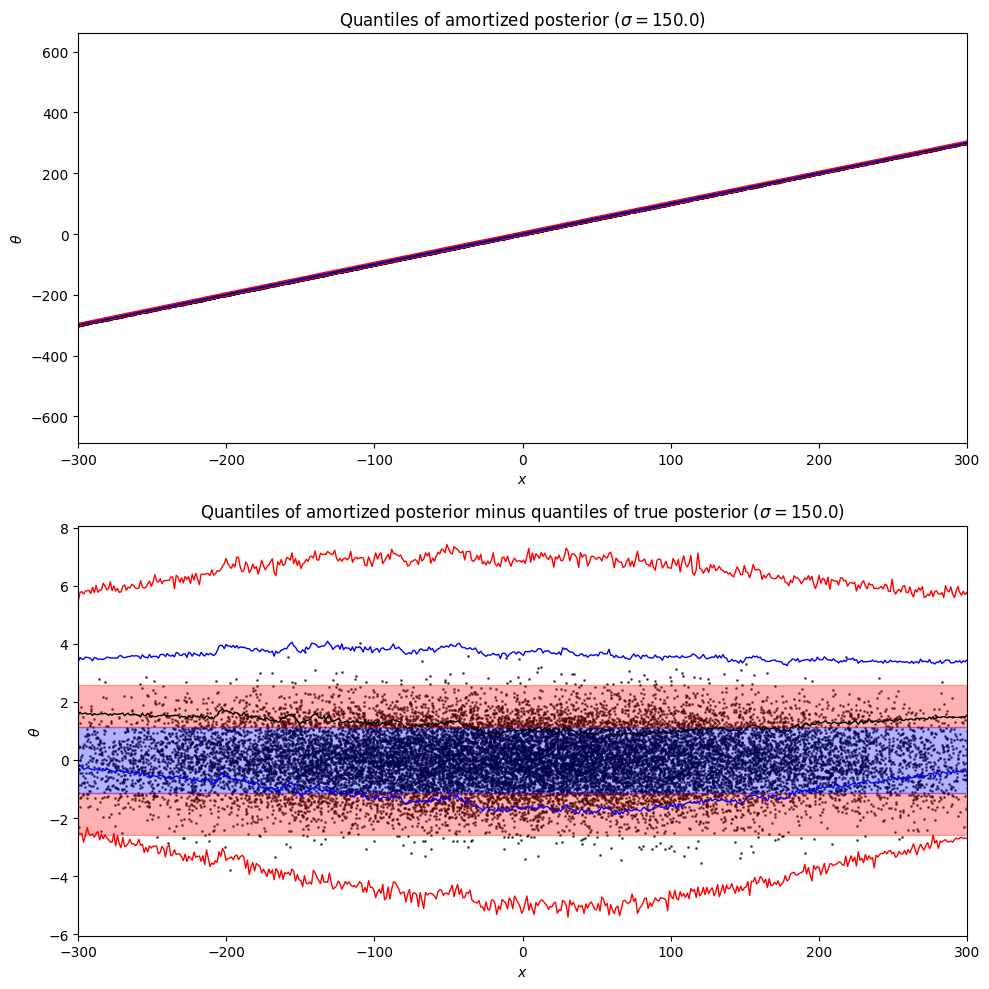

In [9]:
fig, ax = plt.subplots(figsize=(10,10), nrows=2)

x_range = np.linspace(-300,300,500)
quantiles = approximate_posterior_quantiles_against_x(amortized_posterior, x_range)

title = "Quantiles of amortized posterior" + r" ($\sigma = $" + f"{sigma})"
plot_approximate_posterior_quantiles_against_x(x_range, quantiles, sigma, title=title, ax=ax[0], samples=amortized_posterior_samples)

title = "Quantiles of amortized posterior minus quantiles of true posterior" + r" ($\sigma = $" + f"{sigma})"
plot_approximate_posterior_quantiles_diff_against_x(x_range, quantiles, sigma, title=title, ax=ax[1], samples=amortized_posterior_samples)

plt.tight_layout()
plt.show()

## SBC on amortized NPE-A

In [10]:
amortized_sbc_ID = 1

# Load pre-trained amortized sbc ranks
amortized_ranks_name = f"amortized_sbc_ranks{amortized_sbc_ID}_amortized_posterior{amortized_posterior_ID}"
path_to_amortized_ranks = results_path + amortized_ranks_name + ".npy"
path_to_amortized_ranks_config = results_path + amortized_ranks_name + ".yaml"
path_to_amortized_ranks_simulations = results_path + amortized_ranks_name + "_simulations" + ".npz"

# Load sbc ranks
amortized_ranks = np.load(path_to_amortized_ranks)

# Load config
with open(path_to_amortized_ranks_config, "r") as f:
    amortized_ranks_config = yaml.safe_load(f)

# Load samples
amortized_ranks_simulations = np.load(path_to_amortized_ranks_simulations)

N_iter = amortized_ranks_config["N_iter"]
N_samp = amortized_ranks_config["N_samp"]

print(f"Amortized SBC config:")
amortized_ranks_config

Amortized SBC config:


{'N_iter': 10000,
 'N_samp': 10000,
 'amortized_posterior_ID': 0,
 'sigma': 150.0,
 'total_sbc_time': 21.723109543323517}

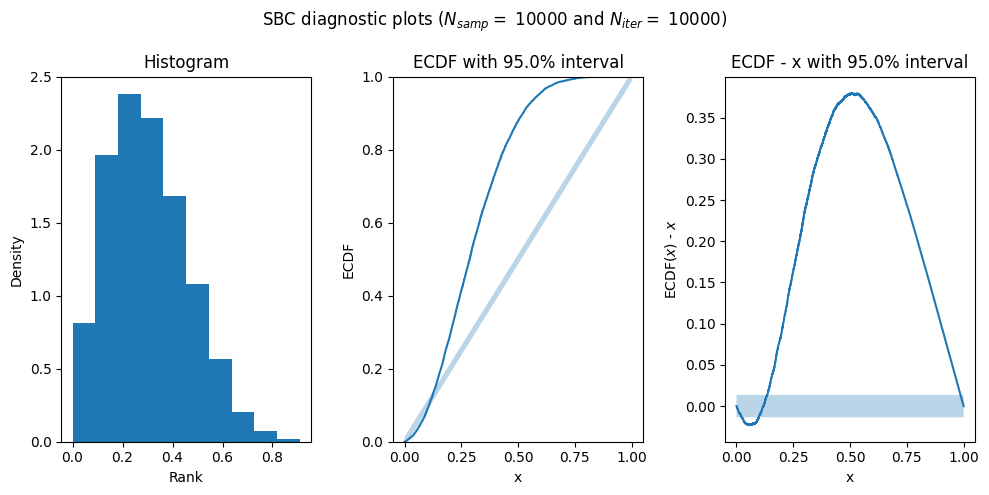

array([<Axes: title={'center': 'Histogram'}, xlabel='Rank', ylabel='Density'>,
       <Axes: title={'center': 'ECDF with 95.0% interval'}, xlabel='x', ylabel='ECDF'>,
       <Axes: title={'center': 'ECDF - x with 95.0% interval'}, xlabel='x', ylabel='ECDF($x$) - $x$'>],
      dtype=object)

In [11]:
# Plot amortized ranks
plot_sbc_all(amortized_ranks, N_iter=N_iter, N_samp=N_samp)

# Sequential NPE-A (SNPE-A)

Tutorial can be found here: https://sbi.readthedocs.io/en/latest/how_to_guide/02_multiround_inference.html

Note that this often fails for SNPE-A either:
- During training, beacuse a covariance matrix of the MDN for one of the proposals becomes non-PSD.
- After training, when attempting to sample from the resulting approximate posterior, because the final approximate posterior has a non-PSD covariance matrix.

Recall that our model is defined as follows:

Given a (large) standard deviation $\sigma$ (we take the default to be $150$), we define the following diffuse Gaussian prior centred at $0$:

$$p(\theta) = N(\theta ; 0, \sigma^2)$$

We define our simulator as follows

$$p(x|\theta) = N(x; \theta , 1) \hspace{5mm} \theta \in \mathbb{R}$$

Suppose we observe some data $x_\text{observed} \in \mathbb{R}$. In this case, we have a true posterior given analytically by

$$p(\theta|x_\text{observed}) = N\left(\theta; \frac{\sigma^2}{1+\sigma^2} x_\text{observed}, \frac{\sigma^2}{1+\sigma^2}\right)$$

We then perform (multi-round) SNPE-A on this inference problem to obtain a posterior approximation. Suppose that the proposal prior $\tilde{\pi}_\text{proposal prior}(\theta)$ for some round (which is the posterior approximation from the previous round conditioned on $x_\text{observed}$) has already learned the true posterior mean accurately, with very small variance $\sigma^2_\text{proposal prior} \approx 0$:

$$\tilde{\pi}_\text{proposal prior}(\theta) \sim N\left(\underbrace{\frac{\sigma^2}{1+\sigma^2} x_\text{observed}}_{\text{true posterior mean}}, \sigma^2_\text{proposal prior}\right) \approx N\left(x_\text{observed}, \sigma^2_\text{proposal prior}\right)$$

where we make the approximation $\frac{\sigma^2}{1+\sigma^2} \approx 1$ (which is very accurate for our large $\sigma^2$) for simplicity. We now perform a round of SNPE-A that involves generating training samples from $\tilde{\pi}_\text{proposal prior}$ and then training an MDN $q_\phi(\theta|x)$ to learn the proposal posterior. Asymptotically (see Prop 1 from fast $\epsilon$-free inference) we have

$$q_\phi(\theta|x) \to \tilde{\pi}_\text{proposal posterior}(\theta|x)$$

and we would need to apply the post-hoc posterior correction (multiply by prior and divide by proposal prior) if we wanted to turn $q_\phi(\theta|x)$ into an approximation to the true posterior. Recalling that our likelihood is

$$\pi(x | \theta) \sim N(\theta, 1)$$

we can obtain the exact proposal posterior analytically. When conditioned on $x_\text{observed}$, it is distributed as follows

$$\tilde{\pi}_\text{proposal posterior}(\theta|x) \sim N\left(x_\text{observed}, \frac{\sigma^2_\text{proposal prior}}{1 + \sigma^2_\text{proposal prior}}\right)$$

Using the Taylor expansion of $x \mapsto \frac{x}{1+x}$, we have the following approximation for small $|x|$

$$\frac{x}{1+x} \approx x$$

Which, when applied to our small variance $\sigma^2_\text{proposal prior}$, yields

$$\frac{\sigma^2_\text{proposal prior}}{1+\sigma^2_\text{proposal prior}} \approx \sigma^2_\text{proposal prior}$$

Thus, both the proposal prior and proposal posterior approximately follow the same distribution:

$$N\left(x_\text{observed}, \sigma^2_\text{proposal prior}\right)$$

During training, the MDN $q_\phi$ approaches the true proposal posterior $\tilde{\pi}_\text{proposal posterior}$ in the limit of infinite data. In practice, however, finite-sample randomness and optimization noise cause the learned variance of $q\phi$ to deviate from that of the true proposal posterior. In particular, if the variance of the learned MDN is even slightly larger than the variance of the true proposal posterior then, since we proved that the latter is approximately equal to the variance of the proposal prior, we conclude that it is plausible for the trained MDN $q_\phi$ to be more dispersed (larger variance) than the proposal prior (that we used to train $q_\phi$). If this is the case (which isn't guaranteed, just plausible) then applying the posthoc correction will lead to a posterior approximation with negative variance:

$$\sigma^2_\text{posterior approximation} = \frac{1}{\frac{1}{\sigma^2_{q_\phi}} - \frac{1}{\sigma^2_\text{proposal prior}}} < 0$$


In [12]:
# THIS WAS A SHORT ONE, NEED A PROPER RUN FOR THIS
sequential_posterior_ID = 1

# Load pre-trained posterior
sequential_posterior_name = f"sequential_posterior{sequential_posterior_ID}"
path_to_sequential_posterior = results_path + sequential_posterior_name + ".pkl"
path_to_sequential_posterior_config = results_path + sequential_posterior_name + ".yaml"
path_to_sequential_posterior_simulations = results_path + sequential_posterior_name + "_simulations" + ".npz"

# Load posterior
with open(path_to_sequential_posterior, "rb") as f:
    sequential_posterior = pickle.load(f)

# Load config
with open(path_to_sequential_posterior_config, "r") as f:
    sequential_posterior_config = yaml.safe_load(f)

# Load samples
sequential_posterior_simulations = np.load(path_to_sequential_posterior_simulations)

print(f"Sequential posterior config:")
sequential_posterior_config

Sequential posterior config:


{'num_components': 1,
 'num_sequential_rounds': 4,
 'num_simulations_per_round': 5000,
 'sigma': 150.0,
 'simulation_times': [0.00029895800000012684,
  0.02026870799999969,
  0.004320625000001854,
  0.0014176250000019763],
 'total_time': 22.402110083000004,
 'training_times': [11.749899916999999,
  1.8117632080000021,
  5.9829401250000025,
  2.8312009170000003],
 'x_observed': 200.0}

A bug in the `sbi` package means that we cannot obtain the exact functional form of the sequential posterior. Thus, we must visualize it by generating samples and plotting a histogram.

Below we plot the sequential posterior approximation for different $x_\text{observed}$.

In [125]:
def posterior_variance(x, sequential_posterior):
    """
    Return variance of posterior approximation for various possible observed x
    
    Note that this is the variance after the final proposal correction, and therefore may
    become negative (well known issue with SNPE-A).
    """
    if not isinstance(x, torch.Tensor):
        x = torch.tensor([float(x)])
    x = x.view(-1,1)

    # By default, sbi z-scores theta using an approximation to the prior variance
    # We obtain this estimator sigma_hat below so that we can undo this transformation
    sigma_hat = 1 / sequential_posterior.posterior_estimator._neural_net.net._transform._transforms[0]._scale
    # Precision of proposal prior in z-scored theta space
    latent_prec_proposal_prior = sequential_posterior.posterior_estimator._prec_pp.squeeze() # Precision of proposal prior
    # Obtain precision of the (uncorrected) MDN
    embedded_x = sequential_posterior.posterior_estimator._neural_net.net._embedding_net(x)
    dist = sequential_posterior.posterior_estimator._neural_net.net._distribution
    _, _, latent_prec_MDN, _, _ = dist.get_mixture_components(embedded_x) # Precision of density estimator
    latent_prec_MDN = latent_prec_MDN.squeeze()
    # Re-scale precisions using sigma_hat to undo z-scoring transformation
    var_MDN = sigma_hat ** 2 / latent_prec_MDN
    var_proposal_prior = sigma_hat ** 2 / latent_prec_proposal_prior
    return 1 / ((1 / var_MDN) - (1 / var_proposal_prior))


def plot_posterior_variance(x_range, ylim=None):
    fig, ax = plt.subplots(figsize=(10,5))
    x_range = torch.tensor(x_range)
    posterior_variances = posterior_variance(x_range, sequential_posterior).detach()
    ax.plot(x_range, np.where(posterior_variances >= 0, posterior_variances, np.nan), color="green", label="Positive posterior MDN variance (posterior well defined)")
    ax.plot(x_range, np.where(posterior_variances < 0, posterior_variances, np.nan), color="red", label="Negative posterior MDN variance (posterior not defined)")
    ax.axhline(0, color="k", linestyle="--")
    ax.set_xlabel(r"$x_{observed}$")
    ax.set_ylabel(r"Variance of posterior approximation $q_\phi(\theta | x_{observed})$")
    ax.legend()
    if ylim:
        ax.set_ylim(ylim)
    plt.show()

/var/folders/z7/hy0q1gld72x_hlvhw62dx0qw0000gn/T/ipykernel_96892/3686835673.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_range = torch.tensor(x_range)


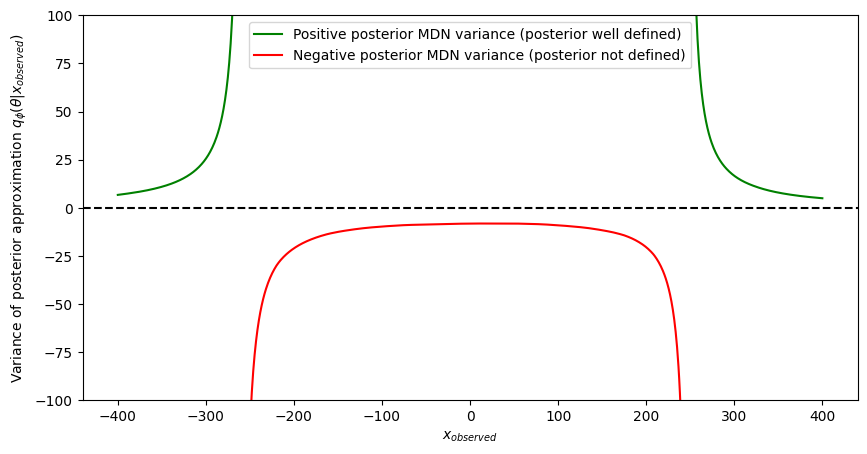

In [126]:
plot_posterior_variance(x_range = torch.linspace(-400,400,1000), ylim=(-100, 100))

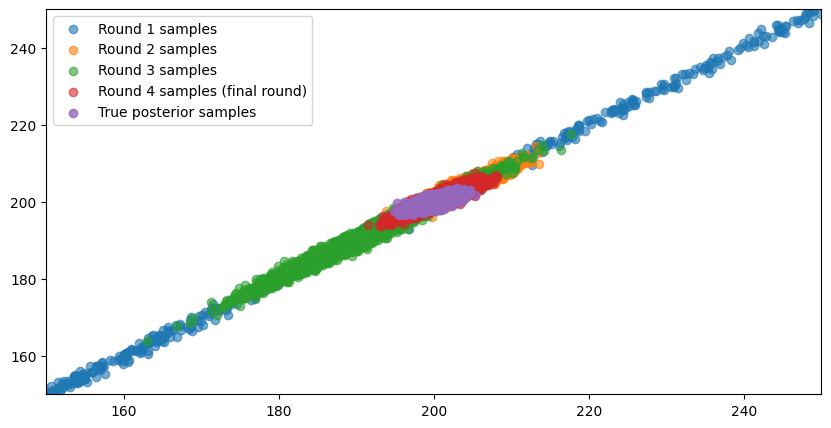

In [123]:
fig, ax = plt.subplots(figsize=(10,5))

num_sequential_rounds = sequential_posterior_config["num_sequential_rounds"]
num_simulations_per_round = sequential_posterior_config["num_simulations_per_round"]

for r in range(num_sequential_rounds):
    parameter_samples = sequential_posterior_simulations[f"parameter_samples_round_{r}"]
    data_samples = sequential_posterior_simulations[f"data_samples_round_{r}"]
    ax.scatter(data_samples, parameter_samples, alpha=0.6, label=f"Round {r+1} samples" + (" (final round)" if r+1==num_sequential_rounds else ""))
true_posterior_param_samples = true_posterior(sigma, x_observed).sample((num_simulations_per_round,))
true_posterior_data_samples = simulator(true_posterior_param_samples)
ax.scatter(true_posterior_data_samples, true_posterior_param_samples, alpha=0.8, label="True posterior samples")

axis_limits = (150,250)
ax.set_xlim(axis_limits)
ax.set_ylim(axis_limits)
ax.legend()
plt.show()

In [16]:
sequential_posterior_samples_x_observed_values = []
for x in x_observed_values:
    sequential_posterior_samples_x_observed_values.append(sequential_posterior.sample((10000, ), x=x, show_progress_bars=False))

theta_range = torch.linspace(-400,400, 1000).view(-1,1)
title=r"Posterior approximation trained sequentially on $x_{obs} = $" + f"{x_observed} for different " + r"$x_{obs}$" + r" ($\sigma = $" + f"{sigma})"
plot_approximate_posterior_hist(sequential_posterior_samples_x_observed_values, prior_pdf, posterior_pdf, theta_range, x_observed=x_observed_values, sigma=sigma, title=title)

AssertionError: The precision matrix of a posterior is not positive definite! This is a known issue for SNPE-A. Either try a different parameter setting, e.g. a different number of mixture components (when contracting SNPE-A), or a different value for the parameter perturbation (when building the posterior).

Plot the sequential posterior approximation for at $x_\text{observed}$.

In [ ]:
sequential_posterior_samples_x_observed = sequential_posterior.sample((10000, ), x=x_observed, show_progress_bars=False).view(-1).tolist()
theta_range = torch.linspace(180,220,1000).view(-1,1)
title = r"Posterior appoximation trained sequentially on $x_{obs} = $" +f"{x_observed} " + r"($\sigma$ =" + f"{sigma})"
plot_approximate_posterior_hist(sequential_posterior_samples_x_observed, prior_pdf, posterior_pdf, theta_range, x_observed, sigma, title=title)

AssertionError: The precision matrix of a posterior is not positive definite! This is a known issue for SNPE-A. Either try a different parameter setting, e.g. a different number of mixture components (when contracting SNPE-A), or a different value for the parameter perturbation (when building the posterior).

Plot quantiles of sequential posterior for various values of $x_\text{observed}$.

- Without training samples

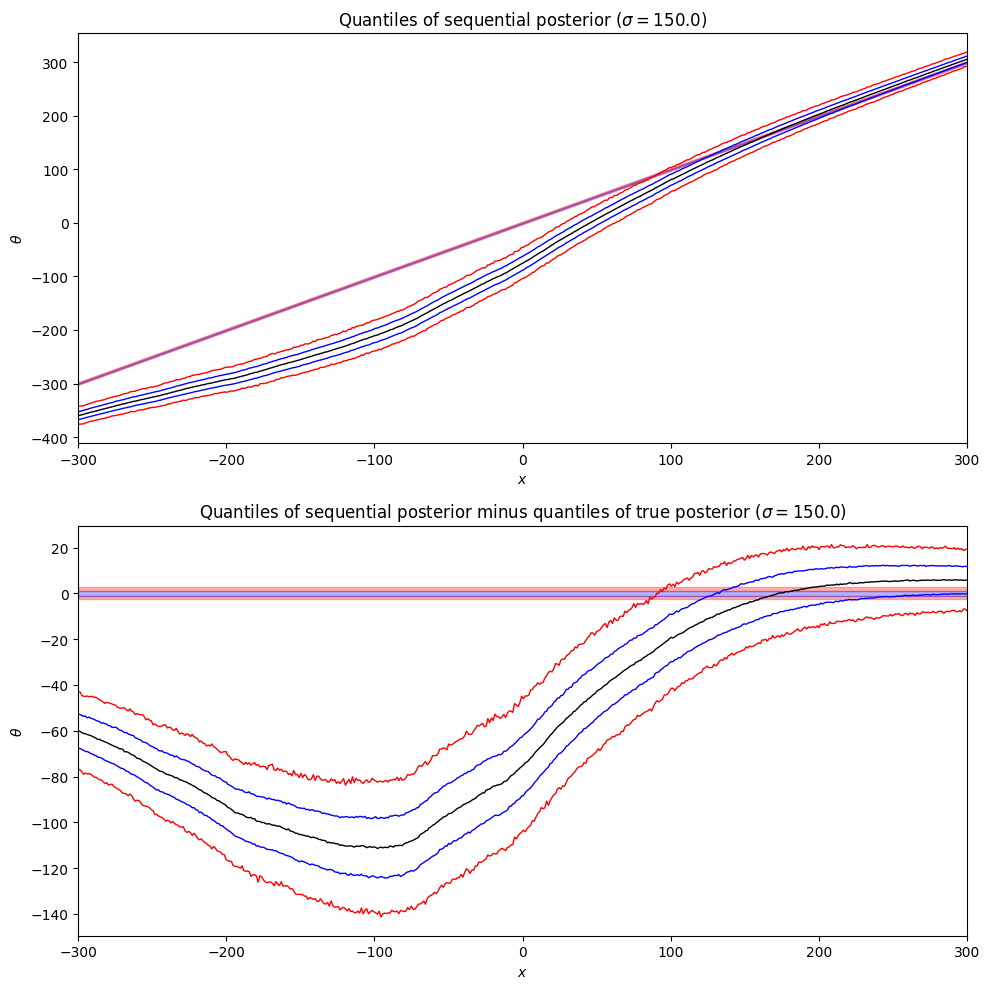

In [ ]:
fig, ax = plt.subplots(figsize=(10,10), nrows=2)

x_range = np.linspace(-300,300,500)
quantiles = approximate_posterior_quantiles_against_x(sequential_posterior, x_range)

title = "Quantiles of sequential posterior" + r" ($\sigma = $" + f"{sigma})"
plot_approximate_posterior_quantiles_against_x(x_range, quantiles, sigma, title=title, ax=ax[0])

title = "Quantiles of sequential posterior minus quantiles of true posterior" + r" ($\sigma = $" + f"{sigma})"
plot_approximate_posterior_quantiles_diff_against_x(x_range, quantiles, sigma, title=title, ax=ax[1])

plt.tight_layout()
plt.show()

- With training samples

In [ ]:
# Retrieve samples
num_sequential_rounds = sequential_posterior_config["num_sequential_rounds"]
sequential_posterior_parameter_samples = sequential_posterior_simulations[f"parameter_samples_round_{num_sequential_rounds-1}"].reshape(-1)
sequential_posterior_data_samples = sequential_posterior_simulations[f"data_samples_round_{num_sequential_rounds-1}"].reshape(-1)
sequential_posterior_samples = {"parameter_samples": sequential_posterior_parameter_samples,
                                "data_samples": sequential_posterior_data_samples}

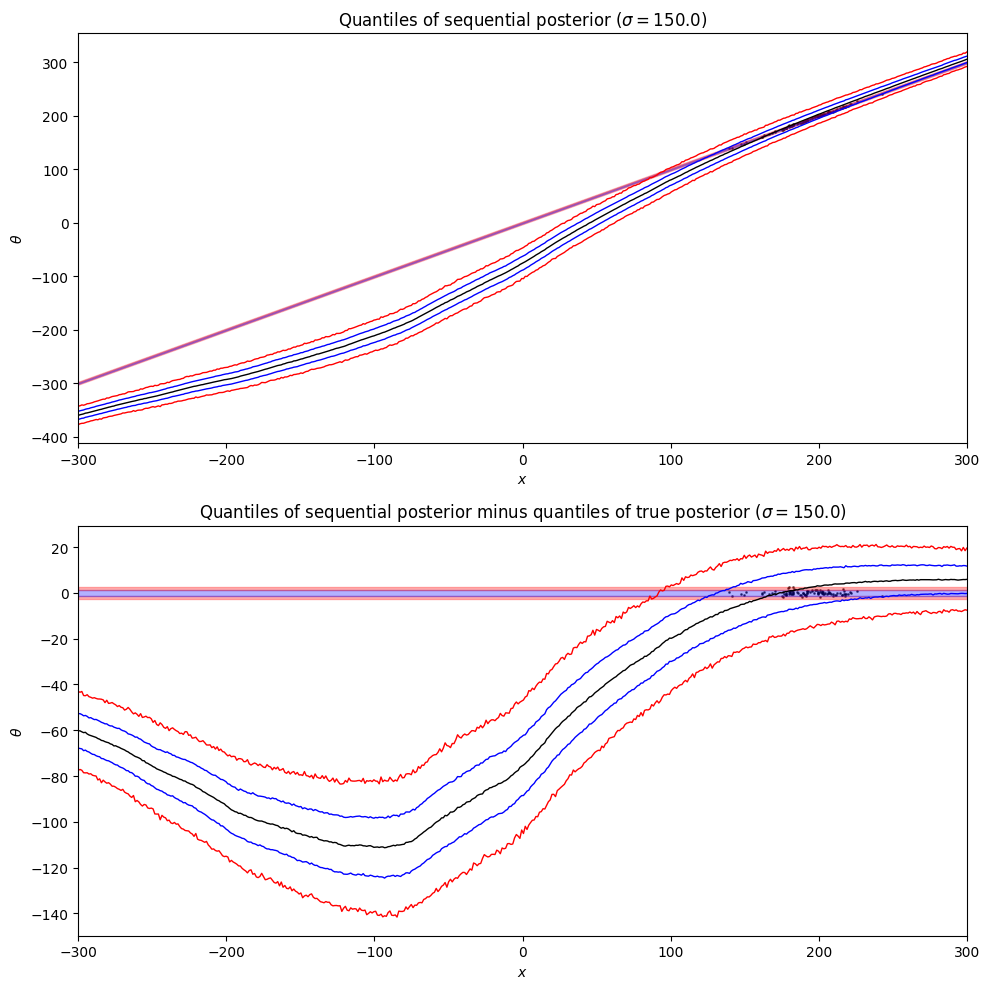

In [ ]:
fig, ax = plt.subplots(figsize=(10,10), nrows=2)

x_range = np.linspace(-300,300,500)
quantiles = approximate_posterior_quantiles_against_x(sequential_posterior, x_range)

title = "Quantiles of sequential posterior" + r" ($\sigma = $" + f"{sigma})"
plot_approximate_posterior_quantiles_against_x(x_range, quantiles, sigma, title=title, ax=ax[0], samples=sequential_posterior_samples)

title = "Quantiles of sequential posterior minus quantiles of true posterior" + r" ($\sigma = $" + f"{sigma})"
plot_approximate_posterior_quantiles_diff_against_x(x_range, quantiles, sigma, title=title, ax=ax[1], samples=sequential_posterior_samples)

plt.tight_layout()
plt.show()

## SBC on SNPE-A

In [ ]:
sequential_sbc_ID = 1

# Load pre-trained sbc ranks
sequential_ranks_name = f"sequential_sbc_ranks{sequential_sbc_ID}"
path_to_sequential_ranks = results_path + sequential_ranks_name + ".npy"
path_to_sequential_ranks_config = results_path + sequential_ranks_name + ".yaml"
path_to_sequential_ranks_simulations = results_path + sequential_ranks_name + "_simulations" + ".npz"

# Load sbc ranks
sequential_ranks = np.load(path_to_sequential_ranks)

# Load config
with open(path_to_sequential_ranks_config, "r") as f:
    sequential_ranks_config = yaml.safe_load(f)

# Load samples
amortized_ranks_simulations = np.load(path_to_amortized_ranks_simulations)

N_iter = sequential_ranks_config["N_iter"]
N_samp = sequential_ranks_config["N_samp"]

print(f"Sequential SBC config:")
sequential_ranks_config

Sequential SBC config:


{'N_iter': 1000,
 'N_samp': 10000,
 'num_components': 1,
 'num_sequential_rounds': 4,
 'num_simulations_per_round': 5000,
 'sigma': 150.0,
 'total_sbc_time': 41978.55242218962}

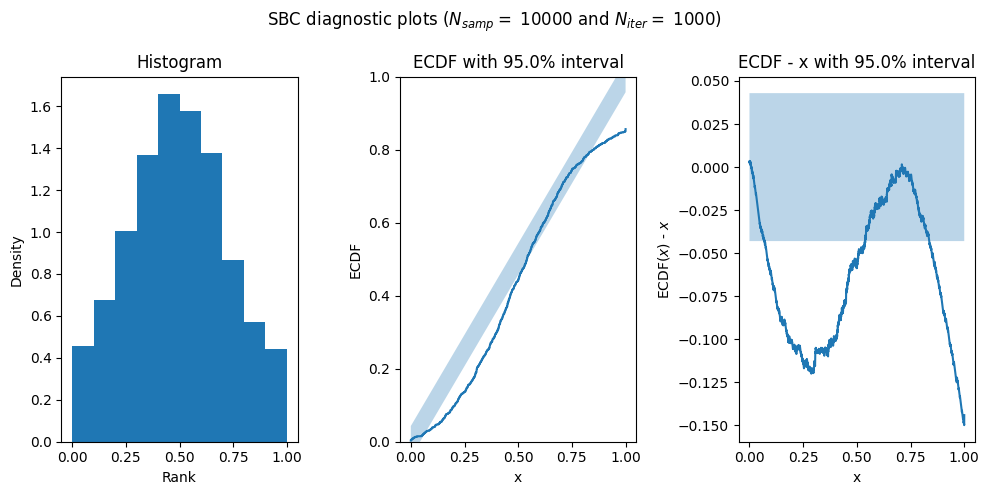

array([<Axes: title={'center': 'Histogram'}, xlabel='Rank', ylabel='Density'>,
       <Axes: title={'center': 'ECDF with 95.0% interval'}, xlabel='x', ylabel='ECDF'>,
       <Axes: title={'center': 'ECDF - x with 95.0% interval'}, xlabel='x', ylabel='ECDF($x$) - $x$'>],
      dtype=object)

In [ ]:
plot_sbc_all(sequential_ranks, N_iter=N_iter, N_samp=N_samp)